In [93]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
with zipfile.ZipFile(r"C:\Users\Yuliya Lavrenyuk\AppData\Local\Temp\bb29dd34-c9d6-4305-80d9-32c9de9523fc_bank+marketing.zip.3fc\bank.zip") as z:
   with z.open("bank-full.csv") as f:
      df = pd.read_csv(f,delimiter=";", encoding="utf-8")
      display(df.head())    # print the first 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
dataset = df[['age','job','marital','education','balance','housing','contact','day','month','duration','campaign','pdays','previous','poutcome','y']]

In [22]:
dataset.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Question 1
## What is the most frequent observation (mode) for the column education?

In [25]:
dataset.education.mode()

0    secondary
Name: education, dtype: object

## Question 2
## Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.
## What are the two features that have the biggest correlation?

In [27]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [28]:
correlation_matrix = numerical_df.corr()

In [32]:
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


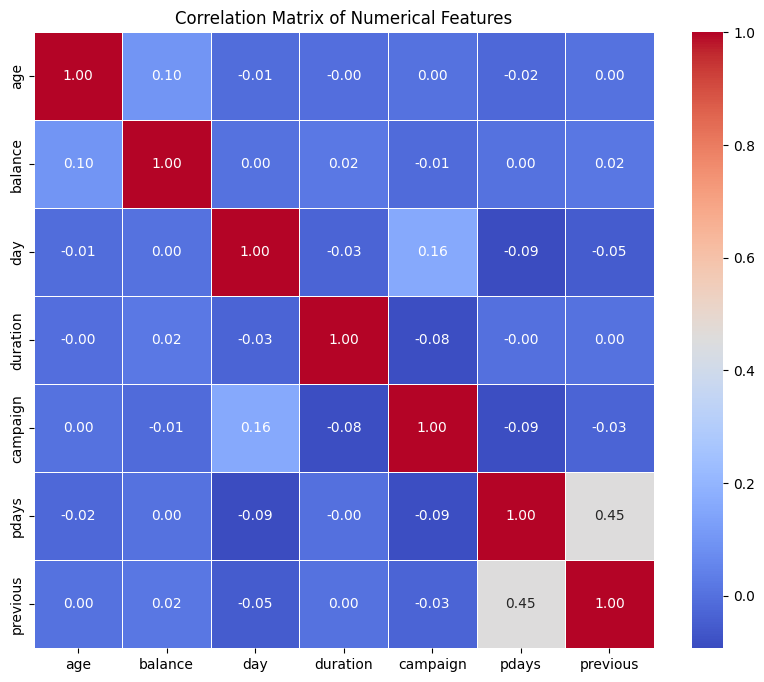

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [29]:
# Remove self-correlations by setting the diagonal to 0
correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))

In [30]:
# Find the maximum absolute correlation and get the corresponding features
max_corr = correlation_matrix_no_diag.abs().unstack().idxmax()
print(f"The two features with the highest correlation are: {max_corr[0]} and {max_corr[1]}")

The two features with the highest correlation are: pdays and previous


## Target encoding:

In [38]:
dataset.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [40]:
(dataset['y'] == 'yes').astype(int).head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [42]:
dataset.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

## Split the data:
Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value y is not in your dataframe.

In [45]:
len(dataset)

45211

In [47]:
df_full_train, df_test= train_test_split(dataset, test_size = 0.2, random_state=42)

In [48]:
len(df_full_train), len(df_test)

(36168, 9043)

In [51]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=42)

In [52]:
len(df_train), len(df_val),len(df_test)

(27126, 9042, 9043)

In [53]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [54]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [55]:
del df_train['y']
del df_val['y']
del df_test['y']

## Question 3
Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).

In [59]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown


In [60]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [61]:
categorical = ['job', 'marital', 'education',  'housing', 'contact', 'month','poutcome']

In [69]:
numerical = ['age','balance', 'day','duration','campaign','pdays','previous']

In [66]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).round(2).to_frame(name='MI')

display(df_mi.head())

,MI
poutcome,0.03
month,0.03
contact,0.01
housing,0.01
job,0.01


## Question 4
Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [70]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [71]:
train_dict[0]

{'job': 'technician',
 'marital': 'single',
 'education': 'tertiary',
 'housing': 'yes',
 'contact': 'cellular',
 'month': 'aug',
 'poutcome': 'unknown',
 'age': 32,
 'balance': 1100,
 'day': 11,
 'duration': 67,
 'campaign': 1,
 'pdays': -1,
 'previous': 0}

In [72]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [73]:
X_train = dv.transform(train_dict)

In [74]:
X_train.shape

(27126, 47)

In [76]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

## Training Logistic Regression:

In [78]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [79]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [80]:
model.predict_proba(X_val)

array([[0.98747767, 0.01252233],
       [0.98963457, 0.01036543],
       [0.85267327, 0.14732673],
       ...,
       [0.94382865, 0.05617135],
       [0.99059147, 0.00940853],
       [0.71082323, 0.28917677]])

In [81]:
y_pred = model.predict_proba(X_val)[:, 1]

In [82]:
y_pred

array([0.01252233, 0.01036543, 0.14732673, ..., 0.05617135, 0.00940853,
       0.28917677])

In [83]:
subscription = y_pred > 0.5

In [88]:
baseline_acc = (y_val == subscription).mean()
baseline_acc

0.9015704490157045

## Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [89]:
feature_accuracies = {}

In [90]:
all_features = categorical + numerical

In [91]:
# Iterate over each feature to remove it and re-train the model
for feature in all_features:
    # Create a copy of the training set excluding the current feature
    train_dict_subset = df_train.drop(columns=[feature]).to_dict(orient='records')
    
    # Transform the subset using the DictVectorizer
    X_train_subset = dv.transform(train_dict_subset)
    
    # Train the logistic regression model on the subset
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_subset, y_train)
    
    # Transform the validation data subset (without the feature)
    val_dict_subset = df_val.drop(columns=[feature]).to_dict(orient='records')
    X_val_subset = dv.transform(val_dict_subset)
    
    # Predict on the validation set
    y_pred_subset = model.predict_proba(X_val_subset)[:, 1]
    subscription_subset = y_pred_subset > 0.5
    
    # Calculate accuracy for this model
    acc = (y_val == subscription_subset).mean()
    
    # Record the accuracy drop (baseline accuracy - current accuracy)
    feature_accuracies[feature] = baseline_acc - acc

In [92]:
for feature, acc_drop in sorted(feature_accuracies.items(), key=lambda x: x[1], reverse=True):
    print(f"Feature: {feature}, Accuracy drop: {acc_drop:.4f}")

Feature: duration, Accuracy drop: 0.0127
Feature: poutcome, Accuracy drop: 0.0079
Feature: month, Accuracy drop: 0.0018
Feature: campaign, Accuracy drop: 0.0015
Feature: pdays, Accuracy drop: 0.0010
Feature: contact, Accuracy drop: 0.0008
Feature: balance, Accuracy drop: 0.0007
Feature: education, Accuracy drop: 0.0006
Feature: day, Accuracy drop: 0.0004
Feature: previous, Accuracy drop: 0.0004
Feature: housing, Accuracy drop: 0.0003
Feature: age, Accuracy drop: 0.0003
Feature: job, Accuracy drop: 0.0002
Feature: marital, Accuracy drop: 0.0002


## Question 6
Now let's train a regularized logistic regression.
Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
Train models using all the features as in Q4.
Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

In [94]:
C_values = [0.01, 0.1, 1, 10, 100]

In [95]:
accuracies = {}

In [96]:
for C in C_values:
    # Initialize the Logistic Regression model with the current C value
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    subscription = (y_pred > 0.5)
    accuracy = accuracy_score(y_val, subscription)
    accuracies[C] = round(accuracy, 3)

In [97]:
for C, acc in accuracies.items():
    print(f"C = {C}: Accuracy = {acc}")

C = 0.01: Accuracy = 0.898
C = 0.1: Accuracy = 0.901
C = 1: Accuracy = 0.902
C = 10: Accuracy = 0.901
C = 100: Accuracy = 0.901
